### __Data Reduction__

In [3]:
# import libraries
import numpy as np
import pandas as pd
import random
import io
import requests
from datetime import datetime, timezone, timedelta
import datetime as dt
import time
from collections import Counter
from PIL import Image
import PIL.Image

import six
from six import StringIO
import sys
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

# import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg

# import seaborn
import seaborn as sns

# import plotly graph objects
import plotly.graph_objs as go
import plotly.express as px

# import scipy.cluster.hierarchy
import scipy
import scipy.linalg as la
import scipy.cluster.hierarchy as sch
from scipy.cluster.vq import whiten, kmeans, vq
from scipy.stats import multivariate_normal
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

# import category encoders
#import category_encoders as ce

import statsmodels.api as sm

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import sklearn.model_selection as model_selection
import sklearn.model_selection as cross_validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import average_precision_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_precision_recall_curve, plot_confusion_matrix
from sklearn.feature_selection import RFE
from sklearn import linear_model, datasets
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier

#for showing 2D plot
%matplotlib inline 

# to be able to see multiple ouputs from sungle cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Remove columns from the preliminary feature selection

<Figure size 960x800 with 0 Axes>

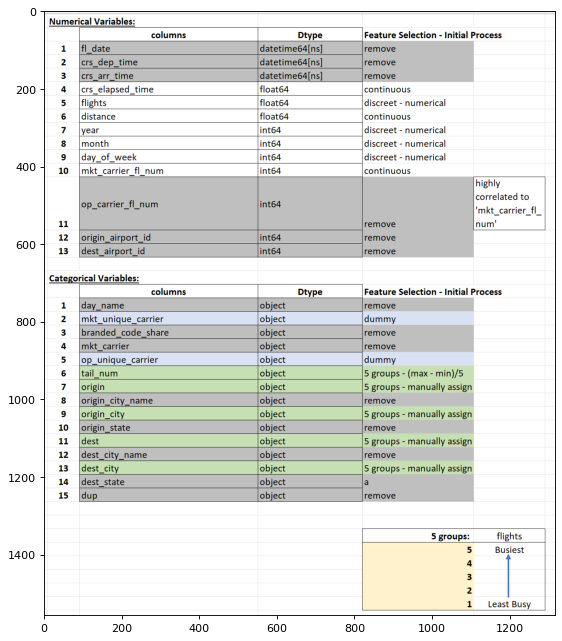

In [ ]:
figure(figsize=(12, 10), dpi=80)
plt.imshow(mpimg.imread('Initial_Feature_selection.png'))

In [3]:
# import training dataset
train_data = pd.read_csv('reduced_train_df.csv')
train_data.info()
train_data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fl_date             520681 non-null  object 
 1   year                520681 non-null  int64  
 2   month               520681 non-null  int64  
 3   day_of_week         520681 non-null  int64  
 4   day_name            520681 non-null  object 
 5   mkt_unique_carrier  520681 non-null  object 
 6   branded_code_share  520681 non-null  object 
 7   mkt_carrier         520681 non-null  object 
 8   mkt_carrier_fl_num  520681 non-null  int64  
 9   op_unique_carrier   520681 non-null  object 
 10  tail_num            520681 non-null  object 
 11  op_carrier_fl_num   520681 non-null  int64  
 12  origin_airport_id   520681 non-null  int64  
 13  origin              520681 non-null  object 
 14  origin_city_name    520681 non-null  object 
 15  origin_city         520681 non-nul

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,AA,AA,AA,4593,YX,...,Washington,DC,1900-01-01 06:55:00,1900-01-01 10:44:00,N,169.0,1.0,1158.0,99.0,1
1,2019-05-01,2019,5,2,Wednesday,AA,AA,AA,4648,YX,...,Charlotte,NC,1900-01-01 14:41:00,1900-01-01 17:05:00,N,144.0,1.0,736.0,4.0,1
2,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,32,DL,...,Atlanta,GA,1900-01-01 17:30:00,1900-01-01 20:44:00,N,134.0,1.0,731.0,15.0,1


In [4]:
# start time to measure the time of the program execution
start_time = time.time()

# 'fl_date' should be converted to datetime ('2019-05-01')
train_data['fl_date'] = pd.to_datetime(train_data['fl_date'], format='%Y-%m-%d')

# convert datetime.time object to pd.datetime ('1900-01-01 11:08:00')
train_data['crs_dep_time'] = pd.to_datetime(train_data['crs_dep_time'],format= '%Y-%m-%d %H:%M:%S')
train_data['crs_arr_time'] = pd.to_datetime(train_data['crs_arr_time'],format= '%Y-%m-%d %H:%M:%S')

# check
train_data.info()
train_data.head(3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   fl_date             520681 non-null  datetime64[ns]
 1   year                520681 non-null  int64         
 2   month               520681 non-null  int64         
 3   day_of_week         520681 non-null  int64         
 4   day_name            520681 non-null  object        
 5   mkt_unique_carrier  520681 non-null  object        
 6   branded_code_share  520681 non-null  object        
 7   mkt_carrier         520681 non-null  object        
 8   mkt_carrier_fl_num  520681 non-null  int64         
 9   op_unique_carrier   520681 non-null  object        
 10  tail_num            520681 non-null  object        
 11  op_carrier_fl_num   520681 non-null  int64         
 12  origin_airport_id   520681 non-null  int64         
 13  origin              520681 no

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,AA,AA,AA,4593,YX,...,Washington,DC,1900-01-01 06:55:00,1900-01-01 10:44:00,N,169.0,1.0,1158.0,99.0,1
1,2019-05-01,2019,5,2,Wednesday,AA,AA,AA,4648,YX,...,Charlotte,NC,1900-01-01 14:41:00,1900-01-01 17:05:00,N,144.0,1.0,736.0,4.0,1
2,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,32,DL,...,Atlanta,GA,1900-01-01 17:30:00,1900-01-01 20:44:00,N,134.0,1.0,731.0,15.0,1




--- 1.519200325012207 seconds ---


In [5]:
# make a copy of the train data
work_df = train_data.copy()

# check
work_df.info()
work_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   fl_date             520681 non-null  datetime64[ns]
 1   year                520681 non-null  int64         
 2   month               520681 non-null  int64         
 3   day_of_week         520681 non-null  int64         
 4   day_name            520681 non-null  object        
 5   mkt_unique_carrier  520681 non-null  object        
 6   branded_code_share  520681 non-null  object        
 7   mkt_carrier         520681 non-null  object        
 8   mkt_carrier_fl_num  520681 non-null  int64         
 9   op_unique_carrier   520681 non-null  object        
 10  tail_num            520681 non-null  object        
 11  op_carrier_fl_num   520681 non-null  int64         
 12  origin_airport_id   520681 non-null  int64         
 13  origin              520681 no

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,AA,AA,AA,4593,YX,...,Washington,DC,1900-01-01 06:55:00,1900-01-01 10:44:00,N,169.0,1.0,1158.0,99.0,1
1,2019-05-01,2019,5,2,Wednesday,AA,AA,AA,4648,YX,...,Charlotte,NC,1900-01-01 14:41:00,1900-01-01 17:05:00,N,144.0,1.0,736.0,4.0,1
2,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,32,DL,...,Atlanta,GA,1900-01-01 17:30:00,1900-01-01 20:44:00,N,134.0,1.0,731.0,15.0,1
3,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,327,DL,...,San Jose,CA,1900-01-01 08:29:00,1900-01-01 10:25:00,N,296.0,1.0,2062.0,12.0,1
4,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,517,DL,...,Atlanta,GA,1900-01-01 18:54:00,1900-01-01 20:19:00,N,85.0,1.0,306.0,35.0,1


#### __Reduce Training Dataset__
> - Prepare 4 different sets of reduced training datasets as follows:
    - 1st size reduction: from 521K rows to 130K rows
    - 2nd size reduction: from 130K rows to 50K rows
    - 3rd size reduction: from 50K rows to 10K rows
    - 4th size reduction: from 10K rows to 8K rows

##### __1st size reduction: from 521K rows to 130K rows__

In [7]:
# check feature in 'branded_code_share'
work_df['branded_code_share'].unique()

array(['AA', 'DL', 'UA', 'G4', 'WN', 'AS', 'NK', 'HA', 'F9', 'B6', 'VX'],
      dtype=object)

In [10]:
# start time to measure the time of the program execution
start_time = time.time()

# subdivide copied train_df to 4 parts, reduce & combine
wk_2019delay2 = work_df[(work_df['year'] == 2019) & (work_df['target_class'] == 1)]
wk_2019nodelay2 = work_df[(work_df['year'] == 2019) & (work_df['target_class'] == 0)]
wk_2018delay2 = work_df[(work_df['year'] == 2018) & (work_df['target_class'] == 1)]
wk_2018nodelay2 = work_df[(work_df['year'] == 2018) & (work_df['target_class'] == 0)]

# check the dataseize
total_rows = len(wk_2019delay2) + len(wk_2019nodelay2) + len(wk_2018delay2) + len(wk_2018nodelay2)
print(f"Total rows: {total_rows} = 2019_delay {len(wk_2019delay2)} + 2019_nodelay {len(wk_2019nodelay2)} + \
2018_delay {len(wk_2018delay2)} + 2018_nodelay {len(wk_2018nodelay2)}")

# export subdivided dataframes to csv files
wk_2019delay2.to_csv('wk_2019delay_v2.csv', index=False)
wk_2019nodelay2.to_csv('wk_2019nodelay_v2.csv', index=False)
wk_2018delay2.to_csv('wk_2018delay_v2.csv', index=False)
wk_2018nodelay2.to_csv('wk_2018nodelay_v2.csv', index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Total rows: 520681 = 2019_delay 152059 + 2019_nodelay 156975 + 2018_delay 101427 + 2018_nodelay 110220


--- 12.274802207946777 seconds ---


In [19]:
# start time to measure the time of the program execution
start_time = time.time()

# Import the original train & test data
filename_train1 = 'wk_2019delay_v2.csv'

# Reduce the original train & test datasets
#  - original train dataset = 30 MB -> reducing to 7 MB
n_train = sum(1 for line in open(filename_train1))-1  # Calculate number of rows in file
s_train = n_train//4  # sample size of 25%
skip_train = sorted(random.sample(range(1, n_train+1), n_train-s_train))  # n+1 to compensate for header 
reduced_wk2019_delay = pd.read_csv(filename_train1, skiprows=skip_train)

reduced_wk2019_delay.info()
reduced_wk2019_delay.head(6)

# Export the reduced train & test datasets to csv files

filename_new_train1 = 'reduced_wk2019_delay_v2.csv'
reduced_wk2019_delay.to_csv(filename_new_train1, index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fl_date             38014 non-null  object 
 1   year                38014 non-null  int64  
 2   month               38014 non-null  int64  
 3   day_of_week         38014 non-null  int64  
 4   day_name            38014 non-null  object 
 5   mkt_unique_carrier  38014 non-null  object 
 6   branded_code_share  38014 non-null  object 
 7   mkt_carrier         38014 non-null  object 
 8   mkt_carrier_fl_num  38014 non-null  int64  
 9   op_unique_carrier   38014 non-null  object 
 10  tail_num            38014 non-null  object 
 11  op_carrier_fl_num   38014 non-null  int64  
 12  origin_airport_id   38014 non-null  int64  
 13  origin              38014 non-null  object 
 14  origin_city_name    38014 non-null  object 
 15  origin_city         38014 non-null  object 
 16  orig

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,1248,DL,...,Atlanta,GA,1900-01-01 18:18:00,1900-01-01 21:34:00,N,136.0,1.0,813.0,25.0,1
1,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,1515,DL,...,Detroit,MI,1900-01-01 05:10:00,1900-01-01 06:16:00,N,66.0,1.0,207.0,4.0,1
2,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,1700,DL,...,Sacramento,CA,1900-01-01 08:57:00,1900-01-01 10:50:00,N,293.0,1.0,2092.0,10.0,1
3,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,1757,DL,...,Detroit,MI,1900-01-01 05:30:00,1900-01-01 07:42:00,N,72.0,1.0,237.0,2.0,1
4,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,1846,DL,...,Tulsa,OK,1900-01-01 16:59:00,1900-01-01 17:58:00,N,119.0,1.0,674.0,9.0,1
5,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,1867,DL,...,Detroit,MI,1900-01-01 07:10:00,1900-01-01 09:09:00,N,119.0,1.0,502.0,4.0,1




--- 1.0718560218811035 seconds ---


In [20]:
# start time to measure the time of the program execution
start_time = time.time()

# Import the original train & test data
filename_train2 = 'wk_2019nodelay_v2.csv'

# Reduce the original train & test datasets
#  - original train dataset = 31 MB -> reducing to 8 MB
n_train = sum(1 for line in open(filename_train2))-1  # Calculate number of rows in file
s_train = n_train//4  # sample size of 25%
skip_train = sorted(random.sample(range(1, n_train+1), n_train-s_train))  # n+1 to compensate for header 
reduced_wk2019_nodelay = pd.read_csv(filename_train2, skiprows=skip_train)

reduced_wk2019_nodelay.info()
reduced_wk2019_nodelay.head(6)

# Export the reduced train & test datasets to csv files

filename_new_train2 = 'reduced_wk2019_nodelay_v2.csv'
reduced_wk2019_nodelay.to_csv(filename_new_train2, index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39243 entries, 0 to 39242
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fl_date             39243 non-null  object 
 1   year                39243 non-null  int64  
 2   month               39243 non-null  int64  
 3   day_of_week         39243 non-null  int64  
 4   day_name            39243 non-null  object 
 5   mkt_unique_carrier  39243 non-null  object 
 6   branded_code_share  39243 non-null  object 
 7   mkt_carrier         39243 non-null  object 
 8   mkt_carrier_fl_num  39243 non-null  int64  
 9   op_unique_carrier   39243 non-null  object 
 10  tail_num            39243 non-null  object 
 11  op_carrier_fl_num   39243 non-null  int64  
 12  origin_airport_id   39243 non-null  int64  
 13  origin              39243 non-null  object 
 14  origin_city_name    39243 non-null  object 
 15  origin_city         39243 non-null  object 
 16  orig

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-12-06,2019,12,4,Friday,WN,WN,WN,2603,WN,...,Atlanta,GA,1900-01-01 14:50:00,1900-01-01 15:55:00,N,65.0,1.0,153.0,-12.0,0
1,2019-12-06,2019,12,4,Friday,WN,WN,WN,2523,WN,...,Los Angeles,CA,1900-01-01 16:05:00,1900-01-01 17:25:00,N,80.0,1.0,236.0,-12.0,0
2,2019-12-06,2019,12,4,Friday,WN,WN,WN,1274,WN,...,San Francisco,CA,1900-01-01 06:00:00,1900-01-01 07:35:00,N,95.0,1.0,337.0,-19.0,0
3,2019-12-06,2019,12,4,Friday,WN,WN,WN,997,WN,...,Atlanta,GA,1900-01-01 06:30:00,1900-01-01 09:10:00,N,160.0,1.0,762.0,-25.0,0
4,2019-12-06,2019,12,4,Friday,WN,WN,WN,2002,WN,...,Atlanta,GA,1900-01-01 17:05:00,1900-01-01 19:55:00,N,110.0,1.0,591.0,-3.0,0
5,2019-12-06,2019,12,4,Friday,WN,WN,WN,2575,WN,...,Denver,CO,1900-01-01 17:30:00,1900-01-01 19:05:00,N,155.0,1.0,895.0,-13.0,0




--- 1.3985369205474854 seconds ---


In [21]:
# start time to measure the time of the program execution
start_time = time.time()

# Import the original train & test data
filename_train3 = 'wk_2018delay_v2.csv'

# Reduce the original train & test datasets
#  - original train dataset = 20 MB -> reducing to 5 MB
n_train = sum(1 for line in open(filename_train3))-1  # Calculate number of rows in file
s_train = n_train//4  # sample size of 25%
skip_train = sorted(random.sample(range(1, n_train+1), n_train-s_train))  # n+1 to compensate for header 
reduced_wk2018_delay = pd.read_csv(filename_train3, skiprows=skip_train)

reduced_wk2018_delay.info()
reduced_wk2018_delay.head(6)

# Export the reduced train & test datasets to csv files

filename_new_train3 = 'reduced_wk2018_delay_v2.csv'
reduced_wk2018_delay.to_csv(filename_new_train3, index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25356 entries, 0 to 25355
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fl_date             25356 non-null  object 
 1   year                25356 non-null  int64  
 2   month               25356 non-null  int64  
 3   day_of_week         25356 non-null  int64  
 4   day_name            25356 non-null  object 
 5   mkt_unique_carrier  25356 non-null  object 
 6   branded_code_share  25356 non-null  object 
 7   mkt_carrier         25356 non-null  object 
 8   mkt_carrier_fl_num  25356 non-null  int64  
 9   op_unique_carrier   25356 non-null  object 
 10  tail_num            25356 non-null  object 
 11  op_carrier_fl_num   25356 non-null  int64  
 12  origin_airport_id   25356 non-null  int64  
 13  origin              25356 non-null  object 
 14  origin_city_name    25356 non-null  object 
 15  origin_city         25356 non-null  object 
 16  orig

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2018-03-09,2018,3,4,Friday,UA,UA,UA,1883,UA,...,San Jose,CA,1900-01-01 19:38:00,1900-01-01 22:18:00,N,280.0,1.0,1829.0,2.0,1
1,2018-03-09,2018,3,4,Friday,UA,UA,UA,1869,UA,...,Orlando,FL,1900-01-01 16:35:00,1900-01-01 19:28:00,N,173.0,1.0,937.0,19.0,1
2,2018-03-09,2018,3,4,Friday,UA,UA,UA,1100,UA,...,San Jose,CA,1900-01-01 10:15:00,1900-01-01 12:54:00,N,279.0,1.0,1829.0,37.0,1
3,2018-03-09,2018,3,4,Friday,UA,UA,UA,594,UA,...,Phoenix,AZ,1900-01-01 19:28:00,1900-01-01 21:25:00,N,117.0,1.0,602.0,2.0,1
4,2018-03-09,2018,3,4,Friday,NK,NK,NK,161,NK,...,Fort Lauderdale,FL,1900-01-01 17:55:00,1900-01-01 21:09:00,N,194.0,1.0,1173.0,46.0,1
5,2018-03-09,2018,3,4,Friday,NK,NK,NK,208,NK,...,Dallas/Fort Worth,TX,1900-01-01 19:26:00,1900-01-01 23:56:00,N,150.0,1.0,1055.0,111.0,1




--- 0.7827229499816895 seconds ---


In [22]:
# start time to measure the time of the program execution
start_time = time.time()

# Import the original train & test data
filename_train4 = 'wk_2018nodelay_v2.csv'

# Reduce the original train & test datasets
#  - original train dataset = 22 MB -> reducing to 5 MB
n_train = sum(1 for line in open(filename_train4))-1  # Calculate number of rows in file
s_train = n_train//4  # sample size of 25%
skip_train = sorted(random.sample(range(1, n_train+1), n_train-s_train))  # n+1 to compensate for header 
reduced_wk2018_nodelay = pd.read_csv(filename_train4, skiprows=skip_train)

reduced_wk2018_nodelay.info()
reduced_wk2018_nodelay.head(6)

# Export the reduced train & test datasets to csv files

filename_new_train4 = 'reduced_wk2018_nodelay_v2.csv'
reduced_wk2018_nodelay.to_csv(filename_new_train4, index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fl_date             27555 non-null  object 
 1   year                27555 non-null  int64  
 2   month               27555 non-null  int64  
 3   day_of_week         27555 non-null  int64  
 4   day_name            27555 non-null  object 
 5   mkt_unique_carrier  27555 non-null  object 
 6   branded_code_share  27555 non-null  object 
 7   mkt_carrier         27555 non-null  object 
 8   mkt_carrier_fl_num  27555 non-null  int64  
 9   op_unique_carrier   27555 non-null  object 
 10  tail_num            27555 non-null  object 
 11  op_carrier_fl_num   27555 non-null  int64  
 12  origin_airport_id   27555 non-null  int64  
 13  origin              27555 non-null  object 
 14  origin_city_name    27555 non-null  object 
 15  origin_city         27555 non-null  object 
 16  orig

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2018-03-01,2018,3,3,Thursday,UA,UA,UA,4920,C5,...,Washington,DC,1900-01-01 10:15:00,1900-01-01 11:46:00,N,91.0,1.0,212.0,-13.0,0
1,2018-03-01,2018,3,3,Thursday,UA,UA,UA,4741,AX,...,Denver,CO,1900-01-01 09:10:00,1900-01-01 10:30:00,N,140.0,1.0,637.0,-12.0,0
2,2018-03-01,2018,3,3,Thursday,UA,UA,UA,4471,G7,...,Chicago,IL,1900-01-01 06:05:00,1900-01-01 08:11:00,N,126.0,1.0,584.0,-1.0,0
3,2018-03-01,2018,3,3,Thursday,AA,AA,AA,3689,MQ,...,Champaign/Urbana,IL,1900-01-01 18:45:00,1900-01-01 20:48:00,N,123.0,1.0,692.0,-18.0,0
4,2018-03-01,2018,3,3,Thursday,AA,AA,AA,3376,MQ,...,Oklahoma City,OK,1900-01-01 08:56:00,1900-01-01 10:00:00,N,64.0,1.0,175.0,-15.0,0
5,2018-03-01,2018,3,3,Thursday,AA,AA,AA,3154,OO,...,Fresno,CA,1900-01-01 14:54:00,1900-01-01 15:48:00,N,114.0,1.0,493.0,-18.0,0




--- 0.8471438884735107 seconds ---


In [23]:
# start time to measure the time of the program execution
start_time = time.time()

# combine all four reduced datasets
frames = [reduced_wk2019_delay, reduced_wk2019_nodelay, 
          reduced_wk2018_delay, reduced_wk2018_nodelay]

reduced_train_df_v2 = pd.concat(frames)
reduced_train_df_v2.info()
reduced_train_df_v2.head(3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130168 entries, 0 to 27554
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fl_date             130168 non-null  object 
 1   year                130168 non-null  int64  
 2   month               130168 non-null  int64  
 3   day_of_week         130168 non-null  int64  
 4   day_name            130168 non-null  object 
 5   mkt_unique_carrier  130168 non-null  object 
 6   branded_code_share  130168 non-null  object 
 7   mkt_carrier         130168 non-null  object 
 8   mkt_carrier_fl_num  130168 non-null  int64  
 9   op_unique_carrier   130168 non-null  object 
 10  tail_num            130168 non-null  object 
 11  op_carrier_fl_num   130168 non-null  int64  
 12  origin_airport_id   130168 non-null  int64  
 13  origin              130168 non-null  object 
 14  origin_city_name    130168 non-null  object 
 15  origin_city         130168 non-null

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,1248,DL,...,Atlanta,GA,1900-01-01 18:18:00,1900-01-01 21:34:00,N,136.0,1.0,813.0,25.0,1
1,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,1515,DL,...,Detroit,MI,1900-01-01 05:10:00,1900-01-01 06:16:00,N,66.0,1.0,207.0,4.0,1
2,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,1700,DL,...,Sacramento,CA,1900-01-01 08:57:00,1900-01-01 10:50:00,N,293.0,1.0,2092.0,10.0,1




--- 0.4614739418029785 seconds ---


In [32]:
# export reduced_train_df to csv
reduced_train_df_v2.to_csv('reduced_train_df_130k.csv', index=False)

In [33]:
work_df2 = pd.read_csv('reduced_train_df_130k.csv')
work_df2['mkt_unique_carrier'].unique()

work_df2.info()

array(['DL', 'UA', 'AA', 'WN', 'NK', 'HA', 'AS', 'G4', 'F9', 'B6', 'VX'],
      dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130168 entries, 0 to 130167
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fl_date             130168 non-null  object 
 1   year                130168 non-null  int64  
 2   month               130168 non-null  int64  
 3   day_of_week         130168 non-null  int64  
 4   day_name            130168 non-null  object 
 5   mkt_unique_carrier  130168 non-null  object 
 6   branded_code_share  130168 non-null  object 
 7   mkt_carrier         130168 non-null  object 
 8   mkt_carrier_fl_num  130168 non-null  int64  
 9   op_unique_carrier   130168 non-null  object 
 10  tail_num            130168 non-null  object 
 11  op_carrier_fl_num   130168 non-null  int64  
 12  origin_airport_id   130168 non-null  int64  
 13  origin              130168 non-null  object 
 14  origin_city_name    130168 non-null  object 
 15  origin_city         130168 non-nul

#### __2nd size reduction: from 130K rows to 50K rows__

In [6]:
# start time to measure the time of the program execution
start_time = time.time()

# subdivide copied train_df to 4 parts, reduce & combine
wk_2019delay3 = work_df2[(work_df2['year'] == 2019) & (work_df2['target_class'] == 1)]
wk_2019nodelay3 = work_df2[(work_df2['year'] == 2019) & (work_df2['target_class'] == 0)]
wk_2018delay3 = work_df2[(work_df2['year'] == 2018) & (work_df2['target_class'] == 1)]
wk_2018nodelay3 = work_df2[(work_df2['year'] == 2018) & (work_df2['target_class'] == 0)]

# check the dataseize
total_rows2 = len(wk_2019delay3) + len(wk_2019nodelay3) + len(wk_2018delay3) + len(wk_2018nodelay3)
print(f"Total rows: {total_rows2} = 2019_delay {len(wk_2019delay3)} + 2019_nodelay {len(wk_2019nodelay3)} + \
2018_delay {len(wk_2018delay3)} + 2018_nodelay {len(wk_2018nodelay3)}")

# export subdivided dataframes to csv files
wk_2019delay3.to_csv('wk_2019delay_v3.csv', index=False)
wk_2019nodelay3.to_csv('wk_2019nodelay_v3.csv', index=False)
wk_2018delay3.to_csv('wk_2018delay_v3.csv', index=False)
wk_2018nodelay3.to_csv('wk_2018nodelay_v3.csv', index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Total rows: 130168 = 2019_delay 38014 + 2019_nodelay 39243 + 2018_delay 25356 + 2018_nodelay 27555


--- 4.194591999053955 seconds ---


In [7]:
# start time to measure the time of the program execution
start_time = time.time()

# Import the original train & test data
filename_train1_1 = 'wk_2019delay_v3.csv'

# Reduce the original train & test datasets
#  - original train dataset = 7 MB -> reducing to 7 MB
n_train = sum(1 for line in open(filename_train1_1))-1  # Calculate number of rows in file
s_train = n_train//2  # sample size of 50%
skip_train = sorted(random.sample(range(1, n_train+1), n_train-s_train))  # n+1 to compensate for header 
reduced_wk2019_delay2 = pd.read_csv(filename_train1_1, skiprows=skip_train)

reduced_wk2019_delay2.info()
reduced_wk2019_delay2.head(6)

# Export the reduced train & test datasets to csv files

filename_new_train1_1 = 'reduced_wk2019_delay_v3.csv'
reduced_wk2019_delay2.to_csv(filename_new_train1_1, index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19007 entries, 0 to 19006
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fl_date             19007 non-null  object 
 1   year                19007 non-null  int64  
 2   month               19007 non-null  int64  
 3   day_of_week         19007 non-null  int64  
 4   day_name            19007 non-null  object 
 5   mkt_unique_carrier  19007 non-null  object 
 6   branded_code_share  19007 non-null  object 
 7   mkt_carrier         19007 non-null  object 
 8   mkt_carrier_fl_num  19007 non-null  int64  
 9   op_unique_carrier   19007 non-null  object 
 10  tail_num            19007 non-null  object 
 11  op_carrier_fl_num   19007 non-null  int64  
 12  origin_airport_id   19007 non-null  int64  
 13  origin              19007 non-null  object 
 14  origin_city_name    19007 non-null  object 
 15  origin_city         19007 non-null  object 
 16  orig

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,1515,DL,...,Detroit,MI,1900-01-01 05:10:00,1900-01-01 06:16:00,N,66.0,1.0,207.0,4.0,1
1,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,1700,DL,...,Sacramento,CA,1900-01-01 08:57:00,1900-01-01 10:50:00,N,293.0,1.0,2092.0,10.0,1
2,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,1757,DL,...,Detroit,MI,1900-01-01 05:30:00,1900-01-01 07:42:00,N,72.0,1.0,237.0,2.0,1
3,2019-05-01,2019,5,2,Wednesday,UA,UA,UA,3402,YX,...,Newark,NJ,1900-01-01 17:25:00,1900-01-01 19:28:00,N,123.0,1.0,529.0,11.0,1
4,2019-05-01,2019,5,2,Wednesday,UA,UA,UA,3720,YX,...,Atlanta,GA,1900-01-01 13:35:00,1900-01-01 18:37:00,N,182.0,1.0,1199.0,85.0,1
5,2019-05-01,2019,5,2,Wednesday,WN,WN,WN,1550,WN,...,Nashville,TN,1900-01-01 08:15:00,1900-01-01 09:40:00,N,85.0,1.0,395.0,36.0,1




--- 0.7106337547302246 seconds ---


In [8]:
# start time to measure the time of the program execution
start_time = time.time()

# Import the original train & test data
filename_train2_1 = 'wk_2019nodelay_v3.csv'

# Reduce the original train & test datasets
#  - original train dataset = 8 MB -> reducing to  MB
n_train = sum(1 for line in open(filename_train2_1))-1  # Calculate number of rows in file
s_train = n_train//2  # sample size of 50%
skip_train = sorted(random.sample(range(1, n_train+1), n_train-s_train))  # n+1 to compensate for header 
reduced_wk2019_nodelay2 = pd.read_csv(filename_train2_1, skiprows=skip_train)

reduced_wk2019_nodelay2.info()
reduced_wk2019_nodelay2.head(6)

# Export the reduced train & test datasets to csv files

filename_new_train2_1 = 'reduced_wk2019_nodelay_v3.csv'
reduced_wk2019_nodelay2.to_csv(filename_new_train2_1, index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19621 entries, 0 to 19620
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fl_date             19621 non-null  object 
 1   year                19621 non-null  int64  
 2   month               19621 non-null  int64  
 3   day_of_week         19621 non-null  int64  
 4   day_name            19621 non-null  object 
 5   mkt_unique_carrier  19621 non-null  object 
 6   branded_code_share  19621 non-null  object 
 7   mkt_carrier         19621 non-null  object 
 8   mkt_carrier_fl_num  19621 non-null  int64  
 9   op_unique_carrier   19621 non-null  object 
 10  tail_num            19621 non-null  object 
 11  op_carrier_fl_num   19621 non-null  int64  
 12  origin_airport_id   19621 non-null  int64  
 13  origin              19621 non-null  object 
 14  origin_city_name    19621 non-null  object 
 15  origin_city         19621 non-null  object 
 16  orig

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-12-06,2019,12,4,Friday,WN,WN,WN,2523,WN,...,Los Angeles,CA,1900-01-01 16:05:00,1900-01-01 17:25:00,N,80.0,1.0,236.0,-12.0,0
1,2019-12-06,2019,12,4,Friday,WN,WN,WN,1274,WN,...,San Francisco,CA,1900-01-01 06:00:00,1900-01-01 07:35:00,N,95.0,1.0,337.0,-19.0,0
2,2019-12-06,2019,12,4,Friday,WN,WN,WN,997,WN,...,Atlanta,GA,1900-01-01 06:30:00,1900-01-01 09:10:00,N,160.0,1.0,762.0,-25.0,0
3,2019-12-06,2019,12,4,Friday,WN,WN,WN,2002,WN,...,Atlanta,GA,1900-01-01 17:05:00,1900-01-01 19:55:00,N,110.0,1.0,591.0,-3.0,0
4,2019-12-06,2019,12,4,Friday,WN,WN,WN,1212,WN,...,Louisville,KY,1900-01-01 09:55:00,1900-01-01 12:10:00,N,75.0,1.0,271.0,-23.0,0
5,2019-12-06,2019,12,4,Friday,B6,B6,B6,590,B6,...,Boston,MA,1900-01-01 10:20:00,1900-01-01 11:49:00,N,89.0,1.0,399.0,-23.0,0




--- 0.7485623359680176 seconds ---


In [9]:
# start time to measure the time of the program execution
start_time = time.time()

# Import the original train & test data
filename_train3_1 = 'wk_2018delay_v3.csv'

# Reduce the original train & test datasets
#  - original train dataset = 5 MB -> reducing to  MB
n_train = sum(1 for line in open(filename_train3_1))-1  # Calculate number of rows in file
s_train = n_train//2  # sample size of 50%
skip_train = sorted(random.sample(range(1, n_train+1), n_train-s_train))  # n+1 to compensate for header 
reduced_wk2018_delay2 = pd.read_csv(filename_train3_1, skiprows=skip_train)

reduced_wk2018_delay2.info()
reduced_wk2018_delay2.head(6)

# Export the reduced train & test datasets to csv files

filename_new_train3_1 = 'reduced_wk2018_delay_v3.csv'
reduced_wk2018_delay2.to_csv(filename_new_train3_1, index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12678 entries, 0 to 12677
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fl_date             12678 non-null  object 
 1   year                12678 non-null  int64  
 2   month               12678 non-null  int64  
 3   day_of_week         12678 non-null  int64  
 4   day_name            12678 non-null  object 
 5   mkt_unique_carrier  12678 non-null  object 
 6   branded_code_share  12678 non-null  object 
 7   mkt_carrier         12678 non-null  object 
 8   mkt_carrier_fl_num  12678 non-null  int64  
 9   op_unique_carrier   12678 non-null  object 
 10  tail_num            12678 non-null  object 
 11  op_carrier_fl_num   12678 non-null  int64  
 12  origin_airport_id   12678 non-null  int64  
 13  origin              12678 non-null  object 
 14  origin_city_name    12678 non-null  object 
 15  origin_city         12678 non-null  object 
 16  orig

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2018-03-09,2018,3,4,Friday,UA,UA,UA,1883,UA,...,San Jose,CA,1900-01-01 19:38:00,1900-01-01 22:18:00,N,280.0,1.0,1829.0,2.0,1
1,2018-03-09,2018,3,4,Friday,UA,UA,UA,1869,UA,...,Orlando,FL,1900-01-01 16:35:00,1900-01-01 19:28:00,N,173.0,1.0,937.0,19.0,1
2,2018-03-09,2018,3,4,Friday,UA,UA,UA,594,UA,...,Phoenix,AZ,1900-01-01 19:28:00,1900-01-01 21:25:00,N,117.0,1.0,602.0,2.0,1
3,2018-03-09,2018,3,4,Friday,NK,NK,NK,208,NK,...,Dallas/Fort Worth,TX,1900-01-01 19:26:00,1900-01-01 23:56:00,N,150.0,1.0,1055.0,111.0,1
4,2018-03-09,2018,3,4,Friday,AA,AA,AA,5423,OH,...,Cedar Rapids/Iowa City,IA,1900-01-01 11:55:00,1900-01-01 13:25:00,N,150.0,1.0,742.0,5.0,1
5,2018-03-09,2018,3,4,Friday,AA,AA,AA,5058,OH,...,Philadelphia,PA,1900-01-01 13:45:00,1900-01-01 14:54:00,N,69.0,1.0,212.0,9.0,1




--- 0.41635632514953613 seconds ---


In [10]:
# start time to measure the time of the program execution
start_time = time.time()

# Import the original train & test data
filename_train4_1 = 'wk_2018nodelay_v3.csv'

# Reduce the original train & test datasets
#  - original train dataset = 5 MB -> reducing to  MB
n_train = sum(1 for line in open(filename_train4_1))-1  # Calculate number of rows in file
s_train = n_train//2  # sample size of 50%
skip_train = sorted(random.sample(range(1, n_train+1), n_train-s_train))  # n+1 to compensate for header 
reduced_wk2018_nodelay2 = pd.read_csv(filename_train4_1, skiprows=skip_train)

reduced_wk2018_nodelay2.info()
reduced_wk2018_nodelay2.head(6)

# Export the reduced train & test datasets to csv files

filename_new_train4_1 = 'reduced_wk2018_nodelay_v3.csv'
reduced_wk2018_nodelay2.to_csv(filename_new_train4_1, index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13777 entries, 0 to 13776
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fl_date             13777 non-null  object 
 1   year                13777 non-null  int64  
 2   month               13777 non-null  int64  
 3   day_of_week         13777 non-null  int64  
 4   day_name            13777 non-null  object 
 5   mkt_unique_carrier  13777 non-null  object 
 6   branded_code_share  13777 non-null  object 
 7   mkt_carrier         13777 non-null  object 
 8   mkt_carrier_fl_num  13777 non-null  int64  
 9   op_unique_carrier   13777 non-null  object 
 10  tail_num            13777 non-null  object 
 11  op_carrier_fl_num   13777 non-null  int64  
 12  origin_airport_id   13777 non-null  int64  
 13  origin              13777 non-null  object 
 14  origin_city_name    13777 non-null  object 
 15  origin_city         13777 non-null  object 
 16  orig

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2018-03-01,2018,3,3,Thursday,UA,UA,UA,4920,C5,...,Washington,DC,1900-01-01 10:15:00,1900-01-01 11:46:00,N,91.0,1.0,212.0,-13.0,0
1,2018-03-01,2018,3,3,Thursday,AA,AA,AA,3689,MQ,...,Champaign/Urbana,IL,1900-01-01 18:45:00,1900-01-01 20:48:00,N,123.0,1.0,692.0,-18.0,0
2,2018-03-01,2018,3,3,Thursday,AA,AA,AA,3376,MQ,...,Oklahoma City,OK,1900-01-01 08:56:00,1900-01-01 10:00:00,N,64.0,1.0,175.0,-15.0,0
3,2018-03-01,2018,3,3,Thursday,AS,AS,AS,3472,OO,...,Fresno,CA,1900-01-01 18:30:00,1900-01-01 19:45:00,N,75.0,1.0,314.0,-10.0,0
4,2018-03-01,2018,3,3,Thursday,WN,WN,WN,1164,WN,...,Oakland,CA,1900-01-01 07:10:00,1900-01-01 08:35:00,N,85.0,1.0,337.0,-5.0,0
5,2018-03-01,2018,3,3,Thursday,WN,WN,WN,270,WN,...,Austin,TX,1900-01-01 07:15:00,1900-01-01 08:45:00,N,90.0,1.0,444.0,-7.0,0




--- 1.0801777839660645 seconds ---


In [11]:
# start time to measure the time of the program execution
start_time = time.time()

# combine all four reduced datasets
frames2 = [reduced_wk2019_delay2, reduced_wk2019_nodelay2, 
          reduced_wk2018_delay2, reduced_wk2018_nodelay2]

reduced_train_df_v3 = pd.concat(frames2)
reduced_train_df_v3.info()
reduced_train_df_v3.head(3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65083 entries, 0 to 13776
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fl_date             65083 non-null  object 
 1   year                65083 non-null  int64  
 2   month               65083 non-null  int64  
 3   day_of_week         65083 non-null  int64  
 4   day_name            65083 non-null  object 
 5   mkt_unique_carrier  65083 non-null  object 
 6   branded_code_share  65083 non-null  object 
 7   mkt_carrier         65083 non-null  object 
 8   mkt_carrier_fl_num  65083 non-null  int64  
 9   op_unique_carrier   65083 non-null  object 
 10  tail_num            65083 non-null  object 
 11  op_carrier_fl_num   65083 non-null  int64  
 12  origin_airport_id   65083 non-null  int64  
 13  origin              65083 non-null  object 
 14  origin_city_name    65083 non-null  object 
 15  origin_city         65083 non-null  object 
 16  orig

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,1515,DL,...,Detroit,MI,1900-01-01 05:10:00,1900-01-01 06:16:00,N,66.0,1.0,207.0,4.0,1
1,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,1700,DL,...,Sacramento,CA,1900-01-01 08:57:00,1900-01-01 10:50:00,N,293.0,1.0,2092.0,10.0,1
2,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,1757,DL,...,Detroit,MI,1900-01-01 05:30:00,1900-01-01 07:42:00,N,72.0,1.0,237.0,2.0,1




--- 0.28708863258361816 seconds ---


In [12]:
# export reduced_train_df to csv
reduced_train_df_v3.to_csv('reduced_train_df_65k.csv', index=False)

In [13]:
work_df3 = pd.read_csv('reduced_train_df_65k.csv')
work_df3['mkt_unique_carrier'].unique()

work_df3.info()

array(['DL', 'UA', 'WN', 'AA', 'G4', 'F9', 'AS', 'B6', 'NK', 'HA', 'VX'],
      dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65083 entries, 0 to 65082
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fl_date             65083 non-null  object 
 1   year                65083 non-null  int64  
 2   month               65083 non-null  int64  
 3   day_of_week         65083 non-null  int64  
 4   day_name            65083 non-null  object 
 5   mkt_unique_carrier  65083 non-null  object 
 6   branded_code_share  65083 non-null  object 
 7   mkt_carrier         65083 non-null  object 
 8   mkt_carrier_fl_num  65083 non-null  int64  
 9   op_unique_carrier   65083 non-null  object 
 10  tail_num            65083 non-null  object 
 11  op_carrier_fl_num   65083 non-null  int64  
 12  origin_airport_id   65083 non-null  int64  
 13  origin              65083 non-null  object 
 14  origin_city_name    65083 non-null  object 
 15  origin_city         65083 non-null  object 
 16  orig

#### __3rd size reduction: from 50K rows to 10K rows__

In [14]:
# start time to measure the time of the program execution
start_time = time.time()

# subdivide copied train_df to 4 parts, reduce & combine
wk_2019delay4 = work_df3[(work_df3['year'] == 2019) & (work_df3['target_class'] == 1)]
wk_2019nodelay4 = work_df3[(work_df3['year'] == 2019) & (work_df3['target_class'] == 0)]
wk_2018delay4 = work_df3[(work_df3['year'] == 2018) & (work_df3['target_class'] == 1)]
wk_2018nodelay4 = work_df3[(work_df3['year'] == 2018) & (work_df3['target_class'] == 0)]

# check the dataseize
total_rows3 = len(wk_2019delay4) + len(wk_2019nodelay4) + len(wk_2018delay4) + len(wk_2018nodelay4)
print(f"Total rows: {total_rows3} = 2019_delay {len(wk_2019delay4)} + 2019_nodelay {len(wk_2019nodelay4)} + \
2018_delay {len(wk_2018delay4)} + 2018_nodelay {len(wk_2018nodelay4)}")

# export subdivided dataframes to csv files
wk_2019delay4.to_csv('wk_2019delay_v4.csv', index=False)
wk_2019nodelay4.to_csv('wk_2019nodelay_v4.csv', index=False)
wk_2018delay4.to_csv('wk_2018delay_v4.csv', index=False)
wk_2018nodelay4.to_csv('wk_2018nodelay_v4.csv', index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Total rows: 65083 = 2019_delay 19007 + 2019_nodelay 19621 + 2018_delay 12678 + 2018_nodelay 13777


--- 1.9580321311950684 seconds ---


In [16]:
# start time to measure the time of the program execution
start_time = time.time()

# Import the original train & test data
filename_train1_2 = 'wk_2019delay_v4.csv'

# Reduce the original train & test datasets
#  - original train dataset = 30 MB -> reducing to 7 MB
n_train = sum(1 for line in open(filename_train1_2))-1  # Calculate number of rows in file
s_train = n_train//4 # sample size of 25%
skip_train = sorted(random.sample(range(1, n_train+1), n_train-s_train))  # n+1 to compensate for header 
reduced_wk2019_delay4 = pd.read_csv(filename_train1_2, skiprows=skip_train)

reduced_wk2019_delay4.info()
reduced_wk2019_delay4.head(6)

# Export the reduced train & test datasets to csv files

filename_new_train1_2 = 'reduced_wk2019_delay_v4.csv'
reduced_wk2019_delay4.to_csv(filename_new_train1_2, index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4751 entries, 0 to 4750
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fl_date             4751 non-null   object 
 1   year                4751 non-null   int64  
 2   month               4751 non-null   int64  
 3   day_of_week         4751 non-null   int64  
 4   day_name            4751 non-null   object 
 5   mkt_unique_carrier  4751 non-null   object 
 6   branded_code_share  4751 non-null   object 
 7   mkt_carrier         4751 non-null   object 
 8   mkt_carrier_fl_num  4751 non-null   int64  
 9   op_unique_carrier   4751 non-null   object 
 10  tail_num            4751 non-null   object 
 11  op_carrier_fl_num   4751 non-null   int64  
 12  origin_airport_id   4751 non-null   int64  
 13  origin              4751 non-null   object 
 14  origin_city_name    4751 non-null   object 
 15  origin_city         4751 non-null   object 
 16  origin

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,UA,UA,UA,3720,YX,...,Atlanta,GA,1900-01-01 13:35:00,1900-01-01 18:37:00,N,182.0,1.0,1199.0,85.0,1
1,2019-05-01,2019,5,2,Wednesday,UA,UA,UA,230,UA,...,Newark,NJ,1900-01-01 14:15:00,1900-01-01 17:29:00,N,134.0,1.0,719.0,10.0,1
2,2019-05-01,2019,5,2,Wednesday,UA,UA,UA,4598,G7,...,Memphis,TN,1900-01-01 13:25:00,1900-01-01 15:21:00,N,116.0,1.0,491.0,27.0,1
3,2019-05-01,2019,5,2,Wednesday,AA,AA,AA,2180,AA,...,Denver,CO,1900-01-01 16:27:00,1900-01-01 17:32:00,N,125.0,1.0,641.0,10.0,1
4,2019-05-01,2019,5,2,Wednesday,F9,F9,F9,667,F9,...,San Francisco,CA,1900-01-01 22:10:00,1900-01-01 23:52:00,N,162.0,1.0,967.0,26.0,1
5,2019-05-01,2019,5,2,Wednesday,AS,AS,AS,2038,QX,...,Wichita,KS,1900-01-01 11:40:00,1900-01-01 17:10:00,N,210.0,1.0,1430.0,10.0,1




--- 0.23567748069763184 seconds ---


In [17]:
# start time to measure the time of the program execution
start_time = time.time()

# Import the original train & test data
filename_train2_2 = 'wk_2019nodelay_v4.csv'

# Reduce the original train & test datasets
#  - original train dataset = 31 MB -> reducing to 8 MB
n_train = sum(1 for line in open(filename_train2_2))-1  # Calculate number of rows in file
s_train = n_train//4  # sample size of 25%
skip_train = sorted(random.sample(range(1, n_train+1), n_train-s_train))  # n+1 to compensate for header 
reduced_wk2019_nodelay4 = pd.read_csv(filename_train2_2, skiprows=skip_train)

reduced_wk2019_nodelay4.info()
reduced_wk2019_nodelay4.head(6)

# Export the reduced train & test datasets to csv files

filename_new_train2_2 = 'reduced_wk2019_nodelay_v4.csv'
reduced_wk2019_nodelay4.to_csv(filename_new_train2_2, index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4905 entries, 0 to 4904
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fl_date             4905 non-null   object 
 1   year                4905 non-null   int64  
 2   month               4905 non-null   int64  
 3   day_of_week         4905 non-null   int64  
 4   day_name            4905 non-null   object 
 5   mkt_unique_carrier  4905 non-null   object 
 6   branded_code_share  4905 non-null   object 
 7   mkt_carrier         4905 non-null   object 
 8   mkt_carrier_fl_num  4905 non-null   int64  
 9   op_unique_carrier   4905 non-null   object 
 10  tail_num            4905 non-null   object 
 11  op_carrier_fl_num   4905 non-null   int64  
 12  origin_airport_id   4905 non-null   int64  
 13  origin              4905 non-null   object 
 14  origin_city_name    4905 non-null   object 
 15  origin_city         4905 non-null   object 
 16  origin

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-12-06,2019,12,4,Friday,WN,WN,WN,1274,WN,...,San Francisco,CA,1900-01-01 06:00:00,1900-01-01 07:35:00,N,95.0,1.0,337.0,-19.0,0
1,2019-12-06,2019,12,4,Friday,WN,WN,WN,2002,WN,...,Atlanta,GA,1900-01-01 17:05:00,1900-01-01 19:55:00,N,110.0,1.0,591.0,-3.0,0
2,2019-12-06,2019,12,4,Friday,B6,B6,B6,590,B6,...,Boston,MA,1900-01-01 10:20:00,1900-01-01 11:49:00,N,89.0,1.0,399.0,-23.0,0
3,2019-12-06,2019,12,4,Friday,B6,B6,B6,883,B6,...,Orlando,FL,1900-01-01 16:00:00,1900-01-01 19:03:00,N,183.0,1.0,944.0,-11.0,0
4,2019-12-06,2019,12,4,Friday,AA,AA,AA,4962,PT,...,Lexington,KY,1900-01-01 12:30:00,1900-01-01 14:28:00,N,118.0,1.0,520.0,-21.0,0
5,2019-12-06,2019,12,4,Friday,AA,AA,AA,3537,MQ,...,Dallas/Fort Worth,TX,1900-01-01 15:35:00,1900-01-01 17:50:00,N,135.0,1.0,692.0,-20.0,0




--- 0.2395925521850586 seconds ---


In [18]:
# start time to measure the time of the program execution
start_time = time.time()

# Import the original train & test data
filename_train3_2 = 'wk_2018delay_v4.csv'

# Reduce the original train & test datasets
#  - original train dataset = 20 MB -> reducing to 5 MB
n_train = sum(1 for line in open(filename_train3_2))-1  # Calculate number of rows in file
s_train = n_train//4  # sample size of 25%
skip_train = sorted(random.sample(range(1, n_train+1), n_train-s_train))  # n+1 to compensate for header 
reduced_wk2018_delay4 = pd.read_csv(filename_train3_2, skiprows=skip_train)

reduced_wk2018_delay4.info()
reduced_wk2018_delay4.head(6)

# Export the reduced train & test datasets to csv files

filename_new_train3_2 = 'reduced_wk2018_delay_v4.csv'
reduced_wk2018_delay4.to_csv(filename_new_train3_2, index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fl_date             3169 non-null   object 
 1   year                3169 non-null   int64  
 2   month               3169 non-null   int64  
 3   day_of_week         3169 non-null   int64  
 4   day_name            3169 non-null   object 
 5   mkt_unique_carrier  3169 non-null   object 
 6   branded_code_share  3169 non-null   object 
 7   mkt_carrier         3169 non-null   object 
 8   mkt_carrier_fl_num  3169 non-null   int64  
 9   op_unique_carrier   3169 non-null   object 
 10  tail_num            3169 non-null   object 
 11  op_carrier_fl_num   3169 non-null   int64  
 12  origin_airport_id   3169 non-null   int64  
 13  origin              3169 non-null   object 
 14  origin_city_name    3169 non-null   object 
 15  origin_city         3169 non-null   object 
 16  origin

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2018-03-09,2018,3,4,Friday,UA,UA,UA,1883,UA,...,San Jose,CA,1900-01-01 19:38:00,1900-01-01 22:18:00,N,280.0,1.0,1829.0,2.0,1
1,2018-03-09,2018,3,4,Friday,UA,UA,UA,594,UA,...,Phoenix,AZ,1900-01-01 19:28:00,1900-01-01 21:25:00,N,117.0,1.0,602.0,2.0,1
2,2018-03-09,2018,3,4,Friday,AA,AA,AA,1025,AA,...,San Francisco,CA,1900-01-01 07:55:00,1900-01-01 11:21:00,N,386.0,1.0,2521.0,20.0,1
3,2018-03-09,2018,3,4,Friday,UA,UA,UA,4993,C5,...,Washington,DC,1900-01-01 20:30:00,1900-01-01 21:20:00,N,50.0,1.0,100.0,111.0,1
4,2018-03-09,2018,3,4,Friday,UA,UA,UA,5324,OO,...,Idaho Falls,ID,1900-01-01 19:10:00,1900-01-01 20:55:00,N,105.0,1.0,458.0,3.0,1
5,2018-03-09,2018,3,4,Friday,WN,WN,WN,1204,WN,...,Los Angeles,CA,1900-01-01 11:15:00,1900-01-01 12:35:00,N,80.0,1.0,308.0,9.0,1




--- 0.17327380180358887 seconds ---


In [19]:
# start time to measure the time of the program execution
start_time = time.time()

# Import the original train & test data
filename_train4_2 = 'wk_2018nodelay_v4.csv'

# Reduce the original train & test datasets
#  - original train dataset = 22 MB -> reducing to 5 MB
n_train = sum(1 for line in open(filename_train4_2))-1  # Calculate number of rows in file
s_train = n_train//4  # sample size of 25%
skip_train = sorted(random.sample(range(1, n_train+1), n_train-s_train))  # n+1 to compensate for header 
reduced_wk2018_nodelay4 = pd.read_csv(filename_train4_2, skiprows=skip_train)

reduced_wk2018_nodelay4.info()
reduced_wk2018_nodelay4.head(6)

# Export the reduced train & test datasets to csv files

filename_new_train4_2 = 'reduced_wk2018_nodelay_v4.csv'
reduced_wk2018_nodelay4.to_csv(filename_new_train4_2, index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3444 entries, 0 to 3443
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fl_date             3444 non-null   object 
 1   year                3444 non-null   int64  
 2   month               3444 non-null   int64  
 3   day_of_week         3444 non-null   int64  
 4   day_name            3444 non-null   object 
 5   mkt_unique_carrier  3444 non-null   object 
 6   branded_code_share  3444 non-null   object 
 7   mkt_carrier         3444 non-null   object 
 8   mkt_carrier_fl_num  3444 non-null   int64  
 9   op_unique_carrier   3444 non-null   object 
 10  tail_num            3444 non-null   object 
 11  op_carrier_fl_num   3444 non-null   int64  
 12  origin_airport_id   3444 non-null   int64  
 13  origin              3444 non-null   object 
 14  origin_city_name    3444 non-null   object 
 15  origin_city         3444 non-null   object 
 16  origin

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2018-03-01,2018,3,3,Thursday,UA,UA,UA,6063,YV,...,Washington,DC,1900-01-01 12:50:00,1900-01-01 15:35:00,N,105.0,1.0,542.0,-25.0,0
1,2018-03-01,2018,3,3,Thursday,UA,UA,UA,1657,UA,...,Las Vegas,NV,1900-01-01 14:48:00,1900-01-01 16:15:00,N,207.0,1.0,1222.0,0.0,0
2,2018-03-01,2018,3,3,Thursday,UA,UA,UA,589,UA,...,Washington,DC,1900-01-01 14:38:00,1900-01-01 18:34:00,N,176.0,1.0,1190.0,-25.0,0
3,2018-03-01,2018,3,3,Thursday,UA,UA,UA,322,UA,...,Phoenix,AZ,1900-01-01 17:35:00,1900-01-01 20:47:00,N,312.0,1.0,1956.0,-22.0,0
4,2018-03-01,2018,3,3,Thursday,DL,DL,DL,873,DL,...,Los Angeles,CA,1900-01-01 15:55:00,1900-01-01 17:34:00,N,159.0,1.0,862.0,-11.0,0
5,2018-03-01,2018,3,3,Thursday,DL,DL,DL,2410,DL,...,Atlanta,GA,1900-01-01 07:00:00,1900-01-01 09:59:00,N,119.0,1.0,721.0,-7.0,0




--- 0.18402552604675293 seconds ---


In [21]:
# start time to measure the time of the program execution
start_time = time.time()

# combine all four reduced datasets
frames3 = [reduced_wk2019_delay4, reduced_wk2019_nodelay4, 
          reduced_wk2018_delay4, reduced_wk2018_nodelay4]

reduced_train_df_v4 = pd.concat(frames3)
reduced_train_df_v4.info()
reduced_train_df_v4.head(3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16269 entries, 0 to 3443
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fl_date             16269 non-null  object 
 1   year                16269 non-null  int64  
 2   month               16269 non-null  int64  
 3   day_of_week         16269 non-null  int64  
 4   day_name            16269 non-null  object 
 5   mkt_unique_carrier  16269 non-null  object 
 6   branded_code_share  16269 non-null  object 
 7   mkt_carrier         16269 non-null  object 
 8   mkt_carrier_fl_num  16269 non-null  int64  
 9   op_unique_carrier   16269 non-null  object 
 10  tail_num            16269 non-null  object 
 11  op_carrier_fl_num   16269 non-null  int64  
 12  origin_airport_id   16269 non-null  int64  
 13  origin              16269 non-null  object 
 14  origin_city_name    16269 non-null  object 
 15  origin_city         16269 non-null  object 
 16  origi

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,UA,UA,UA,3720,YX,...,Atlanta,GA,1900-01-01 13:35:00,1900-01-01 18:37:00,N,182.0,1.0,1199.0,85.0,1
1,2019-05-01,2019,5,2,Wednesday,UA,UA,UA,230,UA,...,Newark,NJ,1900-01-01 14:15:00,1900-01-01 17:29:00,N,134.0,1.0,719.0,10.0,1
2,2019-05-01,2019,5,2,Wednesday,UA,UA,UA,4598,G7,...,Memphis,TN,1900-01-01 13:25:00,1900-01-01 15:21:00,N,116.0,1.0,491.0,27.0,1




--- 0.09289216995239258 seconds ---


In [22]:
# export reduced_train_df to csv
reduced_train_df_v4.to_csv('reduced_train_df_16k.csv', index=False)

In [23]:
work_df4 = pd.read_csv('reduced_train_df_16k.csv')
work_df4['mkt_unique_carrier'].unique()

work_df4.info()

array(['UA', 'AA', 'F9', 'AS', 'DL', 'NK', 'G4', 'WN', 'B6', 'HA', 'VX'],
      dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16269 entries, 0 to 16268
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fl_date             16269 non-null  object 
 1   year                16269 non-null  int64  
 2   month               16269 non-null  int64  
 3   day_of_week         16269 non-null  int64  
 4   day_name            16269 non-null  object 
 5   mkt_unique_carrier  16269 non-null  object 
 6   branded_code_share  16269 non-null  object 
 7   mkt_carrier         16269 non-null  object 
 8   mkt_carrier_fl_num  16269 non-null  int64  
 9   op_unique_carrier   16269 non-null  object 
 10  tail_num            16269 non-null  object 
 11  op_carrier_fl_num   16269 non-null  int64  
 12  origin_airport_id   16269 non-null  int64  
 13  origin              16269 non-null  object 
 14  origin_city_name    16269 non-null  object 
 15  origin_city         16269 non-null  object 
 16  orig

#### __4th size reduction: from 10K rows to 8K rows__

In [24]:
# start time to measure the time of the program execution
start_time = time.time()

# subdivide copied train_df to 4 parts, reduce & combine
wk_2019delay5 = work_df4[(work_df4['year'] == 2019) & (work_df4['target_class'] == 1)]
wk_2019nodelay5 = work_df4[(work_df4['year'] == 2019) & (work_df4['target_class'] == 0)]
wk_2018delay5 = work_df4[(work_df4['year'] == 2018) & (work_df4['target_class'] == 1)]
wk_2018nodelay5 = work_df4[(work_df4['year'] == 2018) & (work_df4['target_class'] == 0)]

# check the dataseize
total_rows4 = len(wk_2019delay5) + len(wk_2019nodelay5) + len(wk_2018delay5) + len(wk_2018nodelay5)
print(f"Total rows: {total_rows4} = 2019_delay {len(wk_2019delay5)} + 2019_nodelay {len(wk_2019nodelay5)} + \
2018_delay {len(wk_2018delay5)} + 2018_nodelay {len(wk_2018nodelay5)}")

# export subdivided dataframes to csv files
wk_2019delay5.to_csv('wk_2019delay_v5.csv', index=False)
wk_2019nodelay5.to_csv('wk_2019nodelay_v5.csv', index=False)
wk_2018delay5.to_csv('wk_2018delay_v5.csv', index=False)
wk_2018nodelay5.to_csv('wk_2018nodelay_v5.csv', index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Total rows: 16269 = 2019_delay 4751 + 2019_nodelay 4905 + 2018_delay 3169 + 2018_nodelay 3444


--- 0.3285396099090576 seconds ---


In [25]:
# start time to measure the time of the program execution
start_time = time.time()

# Import the original train & test data
filename_train1_3 = 'wk_2019delay_v5.csv'

# Reduce the original train & test datasets
#  - original train dataset = 30 MB -> reducing to 7 MB
n_train = sum(1 for line in open(filename_train1_3))-1  # Calculate number of rows in file
s_train = n_train//2  # sample size of 50%
skip_train = sorted(random.sample(range(1, n_train+1), n_train-s_train))  # n+1 to compensate for header 
reduced_wk2019_delay5 = pd.read_csv(filename_train1_3, skiprows=skip_train)

reduced_wk2019_delay5.info()
reduced_wk2019_delay5.head(6)

# Export the reduced train & test datasets to csv files

filename_new_train1_3 = 'reduced_wk2019_delay_v5.csv'
reduced_wk2019_delay5.to_csv(filename_new_train1_3, index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fl_date             2375 non-null   object 
 1   year                2375 non-null   int64  
 2   month               2375 non-null   int64  
 3   day_of_week         2375 non-null   int64  
 4   day_name            2375 non-null   object 
 5   mkt_unique_carrier  2375 non-null   object 
 6   branded_code_share  2375 non-null   object 
 7   mkt_carrier         2375 non-null   object 
 8   mkt_carrier_fl_num  2375 non-null   int64  
 9   op_unique_carrier   2375 non-null   object 
 10  tail_num            2375 non-null   object 
 11  op_carrier_fl_num   2375 non-null   int64  
 12  origin_airport_id   2375 non-null   int64  
 13  origin              2375 non-null   object 
 14  origin_city_name    2375 non-null   object 
 15  origin_city         2375 non-null   object 
 16  origin

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,UA,UA,UA,230,UA,...,Newark,NJ,1900-01-01 14:15:00,1900-01-01 17:29:00,N,134.0,1.0,719.0,10.0,1
1,2019-05-01,2019,5,2,Wednesday,UA,UA,UA,4598,G7,...,Memphis,TN,1900-01-01 13:25:00,1900-01-01 15:21:00,N,116.0,1.0,491.0,27.0,1
2,2019-05-01,2019,5,2,Wednesday,F9,F9,F9,667,F9,...,San Francisco,CA,1900-01-01 22:10:00,1900-01-01 23:52:00,N,162.0,1.0,967.0,26.0,1
3,2019-05-01,2019,5,2,Wednesday,AS,AS,AS,2038,QX,...,Wichita,KS,1900-01-01 11:40:00,1900-01-01 17:10:00,N,210.0,1.0,1430.0,10.0,1
4,2019-05-01,2019,5,2,Wednesday,AS,AS,AS,2110,QX,...,Pasco/Kennewick/Richland,WA,1900-01-01 10:05:00,1900-01-01 11:00:00,N,55.0,1.0,172.0,10.0,1
5,2019-05-01,2019,5,2,Wednesday,AA,AA,AA,1874,AA,...,Boston,MA,1900-01-01 21:15:00,1900-01-01 22:40:00,N,85.0,1.0,280.0,9.0,1




--- 0.11076593399047852 seconds ---


In [26]:
# start time to measure the time of the program execution
start_time = time.time()

# Import the original train & test data
filename_train2_3 = 'wk_2019nodelay_v5.csv'

# Reduce the original train & test datasets
#  - original train dataset = 31 MB -> reducing to 8 MB
n_train = sum(1 for line in open(filename_train2_3))-1  # Calculate number of rows in file
s_train = n_train//2  # sample size of 50%
skip_train = sorted(random.sample(range(1, n_train+1), n_train-s_train))  # n+1 to compensate for header 
reduced_wk2019_nodelay5 = pd.read_csv(filename_train2_3, skiprows=skip_train)

reduced_wk2019_nodelay5.info()
reduced_wk2019_nodelay5.head(6)

# Export the reduced train & test datasets to csv files

filename_new_train2_3 = 'reduced_wk2019_nodelay_v5.csv'
reduced_wk2019_nodelay5.to_csv(filename_new_train2_3, index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fl_date             2452 non-null   object 
 1   year                2452 non-null   int64  
 2   month               2452 non-null   int64  
 3   day_of_week         2452 non-null   int64  
 4   day_name            2452 non-null   object 
 5   mkt_unique_carrier  2452 non-null   object 
 6   branded_code_share  2452 non-null   object 
 7   mkt_carrier         2452 non-null   object 
 8   mkt_carrier_fl_num  2452 non-null   int64  
 9   op_unique_carrier   2452 non-null   object 
 10  tail_num            2452 non-null   object 
 11  op_carrier_fl_num   2452 non-null   int64  
 12  origin_airport_id   2452 non-null   int64  
 13  origin              2452 non-null   object 
 14  origin_city_name    2452 non-null   object 
 15  origin_city         2452 non-null   object 
 16  origin

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-12-06,2019,12,4,Friday,WN,WN,WN,2002,WN,...,Atlanta,GA,1900-01-01 17:05:00,1900-01-01 19:55:00,N,110.0,1.0,591.0,-3.0,0
1,2019-12-06,2019,12,4,Friday,AA,AA,AA,4962,PT,...,Lexington,KY,1900-01-01 12:30:00,1900-01-01 14:28:00,N,118.0,1.0,520.0,-21.0,0
2,2019-12-06,2019,12,4,Friday,DL,DL,DL,2370,DL,...,Detroit,MI,1900-01-01 14:19:00,1900-01-01 21:55:00,N,276.0,1.0,2079.0,-16.0,0
3,2019-12-07,2019,12,5,Saturday,UA,UA,UA,6023,YV,...,Norfolk,VA,1900-01-01 08:30:00,1900-01-01 09:37:00,N,67.0,1.0,157.0,-5.0,0
4,2019-12-07,2019,12,5,Saturday,UA,UA,UA,6259,YV,...,Houston,TX,1900-01-01 07:59:00,1900-01-01 10:41:00,N,222.0,1.0,1208.0,-28.0,0
5,2019-12-07,2019,12,5,Saturday,UA,UA,UA,6220,YV,...,Houston,TX,1900-01-01 16:10:00,1900-01-01 17:16:00,N,66.0,1.0,192.0,-20.0,0




--- 0.1192018985748291 seconds ---


In [27]:
# start time to measure the time of the program execution
start_time = time.time()

# Import the original train & test data
filename_train3_3 = 'wk_2018delay_v5.csv'

# Reduce the original train & test datasets
#  - original train dataset = 20 MB -> reducing to 5 MB
n_train = sum(1 for line in open(filename_train3_3))-1  # Calculate number of rows in file
s_train = n_train//2  # sample size of 50%
skip_train = sorted(random.sample(range(1, n_train+1), n_train-s_train))  # n+1 to compensate for header 
reduced_wk2018_delay5 = pd.read_csv(filename_train3_3, skiprows=skip_train)

reduced_wk2018_delay5.info()
reduced_wk2018_delay5.head(6)

# Export the reduced train & test datasets to csv files

filename_new_train3_3 = 'reduced_wk2018_delay_v5.csv'
reduced_wk2018_delay5.to_csv(filename_new_train3_3, index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fl_date             1584 non-null   object 
 1   year                1584 non-null   int64  
 2   month               1584 non-null   int64  
 3   day_of_week         1584 non-null   int64  
 4   day_name            1584 non-null   object 
 5   mkt_unique_carrier  1584 non-null   object 
 6   branded_code_share  1584 non-null   object 
 7   mkt_carrier         1584 non-null   object 
 8   mkt_carrier_fl_num  1584 non-null   int64  
 9   op_unique_carrier   1584 non-null   object 
 10  tail_num            1584 non-null   object 
 11  op_carrier_fl_num   1584 non-null   int64  
 12  origin_airport_id   1584 non-null   int64  
 13  origin              1584 non-null   object 
 14  origin_city_name    1584 non-null   object 
 15  origin_city         1584 non-null   object 
 16  origin

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2018-03-09,2018,3,4,Friday,UA,UA,UA,594,UA,...,Phoenix,AZ,1900-01-01 19:28:00,1900-01-01 21:25:00,N,117.0,1.0,602.0,2.0,1
1,2018-03-09,2018,3,4,Friday,UA,UA,UA,4993,C5,...,Washington,DC,1900-01-01 20:30:00,1900-01-01 21:20:00,N,50.0,1.0,100.0,111.0,1
2,2018-03-09,2018,3,4,Friday,WN,WN,WN,1204,WN,...,Los Angeles,CA,1900-01-01 11:15:00,1900-01-01 12:35:00,N,80.0,1.0,308.0,9.0,1
3,2018-03-09,2018,3,4,Friday,DL,DL,DL,5981,YX,...,Chicago,IL,1900-01-01 17:15:00,1900-01-01 18:53:00,N,158.0,1.0,733.0,3.0,1
4,2018-03-09,2018,3,4,Friday,AA,AA,AA,2379,AA,...,Indianapolis,IN,1900-01-01 11:20:00,1900-01-01 12:59:00,N,99.0,1.0,427.0,3.0,1
5,2018-03-10,2018,3,5,Saturday,B6,B6,B6,2416,B6,...,Orlando,FL,1900-01-01 15:38:00,1900-01-01 19:03:00,N,145.0,1.0,994.0,66.0,1




--- 0.0998532772064209 seconds ---


In [28]:
# start time to measure the time of the program execution
start_time = time.time()

# Import the original train & test data
filename_train4_3 = 'wk_2018nodelay_v5.csv'

# Reduce the original train & test datasets
#  - original train dataset = 22 MB -> reducing to 5 MB
n_train = sum(1 for line in open(filename_train4_3))-1  # Calculate number of rows in file
s_train = n_train//2  # sample size of 50%
skip_train = sorted(random.sample(range(1, n_train+1), n_train-s_train))  # n+1 to compensate for header 
reduced_wk2018_nodelay5 = pd.read_csv(filename_train4_3, skiprows=skip_train)

reduced_wk2018_nodelay5.info()
reduced_wk2018_nodelay5.head(6)

# Export the reduced train & test datasets to csv files

filename_new_train4_3 = 'reduced_wk2018_nodelay_v5.csv'
reduced_wk2018_nodelay5.to_csv(filename_new_train4_3, index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722 entries, 0 to 1721
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fl_date             1722 non-null   object 
 1   year                1722 non-null   int64  
 2   month               1722 non-null   int64  
 3   day_of_week         1722 non-null   int64  
 4   day_name            1722 non-null   object 
 5   mkt_unique_carrier  1722 non-null   object 
 6   branded_code_share  1722 non-null   object 
 7   mkt_carrier         1722 non-null   object 
 8   mkt_carrier_fl_num  1722 non-null   int64  
 9   op_unique_carrier   1722 non-null   object 
 10  tail_num            1722 non-null   object 
 11  op_carrier_fl_num   1722 non-null   int64  
 12  origin_airport_id   1722 non-null   int64  
 13  origin              1722 non-null   object 
 14  origin_city_name    1722 non-null   object 
 15  origin_city         1722 non-null   object 
 16  origin

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2018-03-01,2018,3,3,Thursday,UA,UA,UA,1657,UA,...,Las Vegas,NV,1900-01-01 14:48:00,1900-01-01 16:15:00,N,207.0,1.0,1222.0,0.0,0
1,2018-03-01,2018,3,3,Thursday,DL,DL,DL,873,DL,...,Los Angeles,CA,1900-01-01 15:55:00,1900-01-01 17:34:00,N,159.0,1.0,862.0,-11.0,0
2,2018-03-01,2018,3,3,Thursday,DL,DL,DL,2410,DL,...,Atlanta,GA,1900-01-01 07:00:00,1900-01-01 09:59:00,N,119.0,1.0,721.0,-7.0,0
3,2018-03-02,2018,3,4,Friday,DL,DL,DL,3548,OO,...,Detroit,MI,1900-01-01 10:49:00,1900-01-01 13:15:00,N,86.0,1.0,346.0,-5.0,0
4,2018-03-02,2018,3,4,Friday,AA,AA,AA,4116,MQ,...,Dallas/Fort Worth,TX,1900-01-01 10:43:00,1900-01-01 12:05:00,N,82.0,1.0,304.0,-19.0,0
5,2018-03-02,2018,3,4,Friday,WN,WN,WN,1513,WN,...,Fort Lauderdale,FL,1900-01-01 13:35:00,1900-01-01 17:35:00,N,180.0,1.0,1167.0,-25.0,0




--- 0.10111427307128906 seconds ---


In [29]:
# start time to measure the time of the program execution
start_time = time.time()

# combine all four reduced datasets
frames4 = [reduced_wk2019_delay5, reduced_wk2019_nodelay5, 
          reduced_wk2018_delay5, reduced_wk2018_nodelay5]

reduced_train_df_v5 = pd.concat(frames4)
reduced_train_df_v5.info()
reduced_train_df_v5.head(3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8133 entries, 0 to 1721
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fl_date             8133 non-null   object 
 1   year                8133 non-null   int64  
 2   month               8133 non-null   int64  
 3   day_of_week         8133 non-null   int64  
 4   day_name            8133 non-null   object 
 5   mkt_unique_carrier  8133 non-null   object 
 6   branded_code_share  8133 non-null   object 
 7   mkt_carrier         8133 non-null   object 
 8   mkt_carrier_fl_num  8133 non-null   int64  
 9   op_unique_carrier   8133 non-null   object 
 10  tail_num            8133 non-null   object 
 11  op_carrier_fl_num   8133 non-null   int64  
 12  origin_airport_id   8133 non-null   int64  
 13  origin              8133 non-null   object 
 14  origin_city_name    8133 non-null   object 
 15  origin_city         8133 non-null   object 
 16  origin

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,UA,UA,UA,230,UA,...,Newark,NJ,1900-01-01 14:15:00,1900-01-01 17:29:00,N,134.0,1.0,719.0,10.0,1
1,2019-05-01,2019,5,2,Wednesday,UA,UA,UA,4598,G7,...,Memphis,TN,1900-01-01 13:25:00,1900-01-01 15:21:00,N,116.0,1.0,491.0,27.0,1
2,2019-05-01,2019,5,2,Wednesday,F9,F9,F9,667,F9,...,San Francisco,CA,1900-01-01 22:10:00,1900-01-01 23:52:00,N,162.0,1.0,967.0,26.0,1




--- 0.12507081031799316 seconds ---


In [30]:
# export reduced_train_df to csv
reduced_train_df_v5.to_csv('reduced_train_df_8k.csv', index=False)

In [31]:
work_df5 = pd.read_csv('reduced_train_df_8k.csv')
work_df5['mkt_unique_carrier'].unique()

work_df5.info()

array(['UA', 'F9', 'AS', 'AA', 'DL', 'NK', 'G4', 'WN', 'B6', 'HA', 'VX'],
      dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8133 entries, 0 to 8132
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fl_date             8133 non-null   object 
 1   year                8133 non-null   int64  
 2   month               8133 non-null   int64  
 3   day_of_week         8133 non-null   int64  
 4   day_name            8133 non-null   object 
 5   mkt_unique_carrier  8133 non-null   object 
 6   branded_code_share  8133 non-null   object 
 7   mkt_carrier         8133 non-null   object 
 8   mkt_carrier_fl_num  8133 non-null   int64  
 9   op_unique_carrier   8133 non-null   object 
 10  tail_num            8133 non-null   object 
 11  op_carrier_fl_num   8133 non-null   int64  
 12  origin_airport_id   8133 non-null   int64  
 13  origin              8133 non-null   object 
 14  origin_city_name    8133 non-null   object 
 15  origin_city         8133 non-null   object 
 16  origin

#### __Adjustment on Reduced Training Datasets above:__
> - restoring data type in 'crs_dep_time' & 'crs_arr_time' variables from 'HH:MM:SS' string formate to integer type (i.e. 655, 700, 1356, etc)
> - 'fl_date' data type to datetime (this change will not be retained after exporting to csv and reimporting to dataframe)
> - from training datasets, removing columns that are not in testing dataset

> - __*Note:__ These changes have been exported to csv files

In [41]:
# start time to measure the time of the program execution
start_time = time.time()

# function that takes variable with time values and returns list of integer values
def convert_int(var_array):
    
    int_values = []
    
    # for each integer value in variable, 
    #   convert the value to string value in specific form
    #   that is acceptable for datetime strptime
    for value in var_array:
        hour = str(value.hour)
        minute = str(value.minute)
        
        if minute == '0':
            minute = '00'
            
        time_string = hour + minute
        int_values.append(int(time_string))
    
    return int_values

# For 'crs_dep_time' and 'crs_arr_time', convert the time values to integer values.

def convert_date_time(df):
    # 'fl_date' should be converted to datetime ('2019-05-01')
    df['fl_date'] = pd.to_datetime(df['fl_date'], format='%Y-%m-%d')

    # convert datetime.time object to pd.datetime ('1900-01-01 11:08:00')
    df['crs_dep_time'] = pd.to_datetime(df['crs_dep_time'],format= '%Y-%m-%d %H:%M:%S')
    df['crs_arr_time'] = pd.to_datetime(df['crs_arr_time'],format= '%Y-%m-%d %H:%M:%S')

    # run the function above to two variables
    time_values_dep2 = convert_int(df['crs_dep_time'])
    time_values_arr2 = convert_int(df['crs_arr_time'])

    # convert variable values to converted values from above
    df['crs_dep_time'] = time_values_dep2
    df['crs_arr_time'] = time_values_arr2

    return df

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")



--- 0.0 seconds ---


In [40]:
# start time to measure the time of the program execution
start_time = time.time()

reduced_train_df_v2 = convert_date_time(reduced_train_df_v2)
reduced_train_df_v3 = convert_date_time(reduced_train_df_v3)
reduced_train_df_v4 = convert_date_time(reduced_train_df_v4)
reduced_train_df_v5 = convert_date_time(reduced_train_df_v5)

# check
reduced_train_df_v2.info()
reduced_train_df_v2.head(3)

reduced_train_df_v3.info()
reduced_train_df_v3.head(3)

reduced_train_df_v4.info()
reduced_train_df_v4.head(3)

reduced_train_df_v5.info()
reduced_train_df_v5.head(3)

# export reduced_train_df to csv
reduced_train_df_v2.to_csv('reduced_train_df_130k.csv', index=False) # work_df2
reduced_train_df_v3.to_csv('reduced_train_df_65k.csv', index=False)  # work_df3
reduced_train_df_v4.to_csv('reduced_train_df_16k.csv', index=False)  # work_df4
reduced_train_df_v5.to_csv('reduced_train_df_8k.csv', index=False)   # work_df5

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130168 entries, 0 to 130167
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   fl_date             130168 non-null  datetime64[ns]
 1   year                130168 non-null  int64         
 2   month               130168 non-null  int64         
 3   day_of_week         130168 non-null  int64         
 4   day_name            130168 non-null  object        
 5   mkt_unique_carrier  130168 non-null  object        
 6   branded_code_share  130168 non-null  object        
 7   mkt_carrier         130168 non-null  object        
 8   mkt_carrier_fl_num  130168 non-null  int64         
 9   op_unique_carrier   130168 non-null  object        
 10  tail_num            130168 non-null  object        
 11  op_carrier_fl_num   130168 non-null  int64         
 12  origin_airport_id   130168 non-null  int64         
 13  origin              130168 no

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,1248,DL,...,Atlanta,GA,1818,2134,N,136.0,1.0,813.0,25.0,1
1,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,1515,DL,...,Detroit,MI,510,616,N,66.0,1.0,207.0,4.0,1
2,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,1700,DL,...,Sacramento,CA,857,1050,N,293.0,1.0,2092.0,10.0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 65083 entries, 0 to 13776
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fl_date             65083 non-null  datetime64[ns]
 1   year                65083 non-null  int64         
 2   month               65083 non-null  int64         
 3   day_of_week         65083 non-null  int64         
 4   day_name            65083 non-null  object        
 5   mkt_unique_carrier  65083 non-null  object        
 6   branded_code_share  65083 non-null  object        
 7   mkt_carrier         65083 non-null  object        
 8   mkt_carrier_fl_num  65083 non-null  int64         
 9   op_unique_carrier   65083 non-null  object        
 10  tail_num            65083 non-null  object        
 11  op_carrier_fl_num   65083 non-null  int64         
 12  origin_airport_id   65083 non-null  int64         
 13  origin              65083 non-null  object    

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,1515,DL,...,Detroit,MI,510,616,N,66.0,1.0,207.0,4.0,1
1,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,1700,DL,...,Sacramento,CA,857,1050,N,293.0,1.0,2092.0,10.0,1
2,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,1757,DL,...,Detroit,MI,530,742,N,72.0,1.0,237.0,2.0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16269 entries, 0 to 3443
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fl_date             16269 non-null  datetime64[ns]
 1   year                16269 non-null  int64         
 2   month               16269 non-null  int64         
 3   day_of_week         16269 non-null  int64         
 4   day_name            16269 non-null  object        
 5   mkt_unique_carrier  16269 non-null  object        
 6   branded_code_share  16269 non-null  object        
 7   mkt_carrier         16269 non-null  object        
 8   mkt_carrier_fl_num  16269 non-null  int64         
 9   op_unique_carrier   16269 non-null  object        
 10  tail_num            16269 non-null  object        
 11  op_carrier_fl_num   16269 non-null  int64         
 12  origin_airport_id   16269 non-null  int64         
 13  origin              16269 non-null  object     

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,UA,UA,UA,3720,YX,...,Atlanta,GA,1335,1837,N,182.0,1.0,1199.0,85.0,1
1,2019-05-01,2019,5,2,Wednesday,UA,UA,UA,230,UA,...,Newark,NJ,1415,1729,N,134.0,1.0,719.0,10.0,1
2,2019-05-01,2019,5,2,Wednesday,UA,UA,UA,4598,G7,...,Memphis,TN,1325,1521,N,116.0,1.0,491.0,27.0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8133 entries, 0 to 1721
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fl_date             8133 non-null   datetime64[ns]
 1   year                8133 non-null   int64         
 2   month               8133 non-null   int64         
 3   day_of_week         8133 non-null   int64         
 4   day_name            8133 non-null   object        
 5   mkt_unique_carrier  8133 non-null   object        
 6   branded_code_share  8133 non-null   object        
 7   mkt_carrier         8133 non-null   object        
 8   mkt_carrier_fl_num  8133 non-null   int64         
 9   op_unique_carrier   8133 non-null   object        
 10  tail_num            8133 non-null   object        
 11  op_carrier_fl_num   8133 non-null   int64         
 12  origin_airport_id   8133 non-null   int64         
 13  origin              8133 non-null   object      

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,UA,UA,UA,230,UA,...,Newark,NJ,1415,1729,N,134.0,1.0,719.0,10.0,1
1,2019-05-01,2019,5,2,Wednesday,UA,UA,UA,4598,G7,...,Memphis,TN,1325,1521,N,116.0,1.0,491.0,27.0,1
2,2019-05-01,2019,5,2,Wednesday,F9,F9,F9,667,F9,...,San Francisco,CA,2210,2352,N,162.0,1.0,967.0,26.0,1




--- 11.857628345489502 seconds ---


In [34]:
# Import testing csv file
test_df = pd.read_csv('flights_test.csv')
test_df.info()
test_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660556 entries, 0 to 660555
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   fl_date             660556 non-null  object
 1   mkt_unique_carrier  660556 non-null  object
 2   branded_code_share  660556 non-null  object
 3   mkt_carrier         660556 non-null  object
 4   mkt_carrier_fl_num  660556 non-null  int64 
 5   op_unique_carrier   660556 non-null  object
 6   tail_num            659057 non-null  object
 7   op_carrier_fl_num   660556 non-null  int64 
 8   origin_airport_id   660556 non-null  int64 
 9   origin              660556 non-null  object
 10  origin_city_name    660556 non-null  object
 11  dest_airport_id     660556 non-null  int64 
 12  dest                660556 non-null  object
 13  dest_city_name      660556 non-null  object
 14  crs_dep_time        660556 non-null  int64 
 15  crs_arr_time        660556 non-null  int64 
 16  du

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
0,2020-01-01,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1810,1945,N,95,1,363
1,2020-01-01,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1150,1320,N,90,1,363
2,2020-01-01,WN,WN,WN,4598,WN,N7885A,4598,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",2020,2130,N,70,1,333


In [51]:
# start time to measure the time of the program execution
start_time = time.time()

# function that removes columns that are not in testing datasets
def remove_columns_notesting(test_df, train_df):
    # get list of columns in test_df
    test_colnames = test_df.columns.tolist()
    test_colnames

    # get list of columns in test_df
    train_colnames = train_df.columns.tolist()
    train_colnames

    # identify the target columns in train_df
    target_columns = ['arr_delay', 'target_class']

    # get the list of columns to be removed from train_df
    remove_columns = list(set(train_colnames) - set(test_colnames) - set(target_columns))
    remove_columns

    # remove the columns identified above from train_df
    train_df = train_df.drop(columns = remove_columns)

    return train_df

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")



--- 0.0 seconds ---


In [54]:
# start time to measure the time of the program execution
start_time = time.time()

# import train_df
train_130k = pd.read_csv('reduced_train_df_130k.csv')
train_65k = pd.read_csv('reduced_train_df_65k.csv')
train_16k = pd.read_csv('reduced_train_df_16k.csv')
train_8k = pd.read_csv('reduced_train_df_8k.csv')

# make the training datasets consistent with testing datasets
train_130k = remove_columns_notesting(test_df, train_130k)
train_65k = remove_columns_notesting(test_df, train_65k)
train_16k = remove_columns_notesting(test_df, train_16k)
train_8k = remove_columns_notesting(test_df, train_8k)

# check
train_130k.info()
train_130k.head(3)

train_65k.info()
train_65k.head(3)

train_16k.info()
train_16k.head(3)

train_8k.info()
train_8k.head(3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130168 entries, 0 to 130167
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fl_date             130168 non-null  object 
 1   mkt_unique_carrier  130168 non-null  object 
 2   branded_code_share  130168 non-null  object 
 3   mkt_carrier         130168 non-null  object 
 4   mkt_carrier_fl_num  130168 non-null  int64  
 5   op_unique_carrier   130168 non-null  object 
 6   tail_num            130168 non-null  object 
 7   op_carrier_fl_num   130168 non-null  int64  
 8   origin_airport_id   130168 non-null  int64  
 9   origin              130168 non-null  object 
 10  origin_city_name    130168 non-null  object 
 11  dest_airport_id     130168 non-null  int64  
 12  dest                130168 non-null  object 
 13  dest_city_name      130168 non-null  object 
 14  crs_dep_time        130168 non-null  int64  
 15  crs_arr_time        130168 non-nul

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,DL,DL,DL,1248,DL,N332DN,1248,10423,AUS,...,ATL,"Atlanta, GA",1818,2134,N,136.0,1.0,813.0,25.0,1
1,2019-05-01,DL,DL,DL,1515,DL,N929AT,1515,15380,TVC,...,DTW,"Detroit, MI",510,616,N,66.0,1.0,207.0,4.0,1
2,2019-05-01,DL,DL,DL,1700,DL,N896DN,1700,10397,ATL,...,SMF,"Sacramento, CA",857,1050,N,293.0,1.0,2092.0,10.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65083 entries, 0 to 65082
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fl_date             65083 non-null  object 
 1   mkt_unique_carrier  65083 non-null  object 
 2   branded_code_share  65083 non-null  object 
 3   mkt_carrier         65083 non-null  object 
 4   mkt_carrier_fl_num  65083 non-null  int64  
 5   op_unique_carrier   65083 non-null  object 
 6   tail_num            65083 non-null  object 
 7   op_carrier_fl_num   65083 non-null  int64  
 8   origin_airport_id   65083 non-null  int64  
 9   origin              65083 non-null  object 
 10  origin_city_name    65083 non-null  object 
 11  dest_airport_id     65083 non-null  int64  
 12  dest                65083 non-null  object 
 13  dest_city_name      65083 non-null  object 
 14  crs_dep_time        65083 non-null  int64  
 15  crs_arr_time        65083 non-null  int64  
 16  dup 

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,DL,DL,DL,1515,DL,N929AT,1515,15380,TVC,...,DTW,"Detroit, MI",510,616,N,66.0,1.0,207.0,4.0,1
1,2019-05-01,DL,DL,DL,1700,DL,N896DN,1700,10397,ATL,...,SMF,"Sacramento, CA",857,1050,N,293.0,1.0,2092.0,10.0,1
2,2019-05-01,DL,DL,DL,1757,DL,N972AT,1757,13342,MKE,...,DTW,"Detroit, MI",530,742,N,72.0,1.0,237.0,2.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16269 entries, 0 to 16268
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fl_date             16269 non-null  object 
 1   mkt_unique_carrier  16269 non-null  object 
 2   branded_code_share  16269 non-null  object 
 3   mkt_carrier         16269 non-null  object 
 4   mkt_carrier_fl_num  16269 non-null  int64  
 5   op_unique_carrier   16269 non-null  object 
 6   tail_num            16269 non-null  object 
 7   op_carrier_fl_num   16269 non-null  int64  
 8   origin_airport_id   16269 non-null  int64  
 9   origin              16269 non-null  object 
 10  origin_city_name    16269 non-null  object 
 11  dest_airport_id     16269 non-null  int64  
 12  dest                16269 non-null  object 
 13  dest_city_name      16269 non-null  object 
 14  crs_dep_time        16269 non-null  int64  
 15  crs_arr_time        16269 non-null  int64  
 16  dup 

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,UA,UA,UA,3720,YX,N736YX,3720,11292,DEN,...,ATL,"Atlanta, GA",1335,1837,N,182.0,1.0,1199.0,85.0,1
1,2019-05-01,UA,UA,UA,230,UA,N66837,230,13930,ORD,...,EWR,"Newark, NJ",1415,1729,N,134.0,1.0,719.0,10.0,1
2,2019-05-01,UA,UA,UA,4598,G7,N169GJ,4598,13930,ORD,...,MEM,"Memphis, TN",1325,1521,N,116.0,1.0,491.0,27.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8133 entries, 0 to 8132
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fl_date             8133 non-null   object 
 1   mkt_unique_carrier  8133 non-null   object 
 2   branded_code_share  8133 non-null   object 
 3   mkt_carrier         8133 non-null   object 
 4   mkt_carrier_fl_num  8133 non-null   int64  
 5   op_unique_carrier   8133 non-null   object 
 6   tail_num            8133 non-null   object 
 7   op_carrier_fl_num   8133 non-null   int64  
 8   origin_airport_id   8133 non-null   int64  
 9   origin              8133 non-null   object 
 10  origin_city_name    8133 non-null   object 
 11  dest_airport_id     8133 non-null   int64  
 12  dest                8133 non-null   object 
 13  dest_city_name      8133 non-null   object 
 14  crs_dep_time        8133 non-null   int64  
 15  crs_arr_time        8133 non-null   int64  
 16  dup   

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,UA,UA,UA,230,UA,N66837,230,13930,ORD,...,EWR,"Newark, NJ",1415,1729,N,134.0,1.0,719.0,10.0,1
1,2019-05-01,UA,UA,UA,4598,G7,N169GJ,4598,13930,ORD,...,MEM,"Memphis, TN",1325,1521,N,116.0,1.0,491.0,27.0,1
2,2019-05-01,F9,F9,F9,667,F9,N318FR,667,11292,DEN,...,SFO,"San Francisco, CA",2210,2352,N,162.0,1.0,967.0,26.0,1




--- 2.3421101570129395 seconds ---


In [55]:
# export reduced_train_df to csv
train_130k.to_csv('reduced_train_df_130kv2.csv', index=False) 
train_65k.to_csv('reduced_train_df_65kv2.csv', index=False) 
train_16k.to_csv('reduced_train_df_16kv2.csv', index=False) 
train_8k.to_csv('reduced_train_df_8kv2.csv', index=False)   